# Курсовой проект по машинному обучению
## Car price prediction
## Использование произвольных автомобильных данных для анализа предсказание цен на автомобили.


### Описание признаков
   - **name**: Название автомобиля (марка и модель),
   - **company**: Компания-производитель,
   - **year**: Год выпуска автомобиля,
   - **Price**: Цена автомобиля,
   - **kms_driven**: Пробег автомобиля в километрах,
   - **fuel_type**: Тип топлива, используемого автомобилем

### Исследование данных

In [279]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [280]:
data=pd.read_csv('dataset/CAR.csv')


In [281]:
data.head(10)

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Toyota Camry 55 SE USA,Toyota,2015,15800$,150 000 km,Hybrid
1,1,Toyota Land Cruiser 200,Toyota,2015,47000$,145 000 km,Petrol
2,2,Toyota Camry 70 XSE,Toyota,2019,20500$,180 246 km,Petrol
3,3,Toyota Highlander IV (U70),Toyota,2019,45300$,108 000 km,Hybrid
4,4,Toyota Crown XVI (S235),Toyota,2023,51500$,7 750 km,Hybrid
5,5,Toyota Sequoia I Restyling,Toyota,2004,23500$,167 000 km,Petrol
6,6,Toyota RAV4 V (XA50),Toyota,2021,37500$,56 000 km,Hybrid
7,7,Toyota Avalon,Toyota,2019,30000$,27 000 km,Hybrid
8,8,Toyota Crown,Toyota,2020,35500$,57 750 km,Petrol
9,9,Toyota Sequoia,Toyota,2022,98500$,12 000 km,Petrol


In [282]:
data.shape

(921, 7)

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  921 non-null    int64 
 1   name        921 non-null    object
 2   company     920 non-null    object
 3   year        918 non-null    object
 4   Price       915 non-null    object
 5   kms_driven  920 non-null    object
 6   fuel_type   914 non-null    object
dtypes: int64(1), object(6)
memory usage: 50.5+ KB


In [285]:
backup=data.copy()

In [286]:
data.describe()

,Unnamed: 0
count,921.000000
mean,452.350706
std,258.148137
min,0.000000
25%,229.000000
50%,459.000000
75%,669.000000
max,899.000000


## Очистка данных

In [287]:
data.isnull().sum()

Unnamed: 0    0
name          0
company       1
year          3
Price         6
kms_driven    1
fuel_type     7
dtype: int64

In [288]:
data = data.dropna()

In [289]:
data.isnull().sum()

Unnamed: 0    0
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [290]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
916    False
917    False
918    False
919    False
920    False
Length: 903, dtype: bool

In [291]:
data['Price'] = data['Price'].str.replace('$', '').astype(int)

In [292]:
data['kms_driven'] = data['kms_driven'].str.replace(' km', '').str.replace(' ', '').astype(int)


In [293]:
data['year'] = data['year'].astype(int)

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 0 to 920
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  903 non-null    int64 
 1   name        903 non-null    object
 2   company     903 non-null    object
 3   year        903 non-null    int32 
 4   Price       903 non-null    int32 
 5   kms_driven  903 non-null    int32 
 6   fuel_type   903 non-null    object
dtypes: int32(3), int64(1), object(3)
memory usage: 45.9+ KB


In [295]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [296]:
data=data.reset_index(drop=True)

In [297]:
data

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Toyota Camry 55,Toyota,2015,15800,150000,Hybrid
1,1,Toyota Land Cruiser,Toyota,2015,47000,145000,Petrol
2,2,Toyota Camry 70,Toyota,2019,20500,180246,Petrol
3,3,Toyota Highlander IV,Toyota,2019,45300,108000,Hybrid
4,4,Toyota Crown XVI,Toyota,2023,51500,7750,Hybrid
...,...,...,...,...,...,...,...
898,895,Honda Fit,Honda,2003,5600,220000,Petrol
899,896,Honda Fit,Honda,2004,6000,240000,Petrol
900,897,Honda Fit,Honda,2005,6700,210000,Petrol
901,898,Honda Fit,Honda,2001,6800,270000,Petrol


In [299]:
#data.to_csv('dataset/cleaned_data_cars.csv',index = False)

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  903 non-null    int64 
 1   name        903 non-null    object
 2   company     903 non-null    object
 3   year        903 non-null    int32 
 4   Price       903 non-null    int32 
 5   kms_driven  903 non-null    int32 
 6   fuel_type   903 non-null    object
dtypes: int32(3), int64(1), object(3)
memory usage: 38.9+ KB


In [301]:
data.describe(include='all')

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
count,903.000000,903,903,903.000000,903.000000,903.000000,903
unique,NaN,323,7,NaN,NaN,NaN,9
top,NaN,Honda Fit,Honda,NaN,NaN,NaN,Petrol
freq,NaN,175,262,NaN,NaN,NaN,672
mean,449.209302,NaN,NaN,2014.349945,33625.808416,100006.370986,NaN
std,259.532040,NaN,NaN,6.686802,45126.375012,81007.869249,NaN
min,0.000000,NaN,NaN,1990.000000,2500.000000,17.000000,NaN
25%,224.500000,NaN,NaN,2010.000000,11600.000000,40000.000000,NaN
50%,451.000000,NaN,NaN,2017.000000,24000.000000,70000.000000,NaN
75%,671.500000,NaN,NaN,2019.000000,42000.000000,150000.000000,NaN


In [302]:
#data=data[data['Price']<60000]

In [303]:
data['company'].unique()

array(['Toyota', 'Honda', 'Mercedes-Benz', 'Lexus', 'BMW', 'Hyundai',
       'Kia'], dtype=object)

In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [305]:
### Кодирование признаков


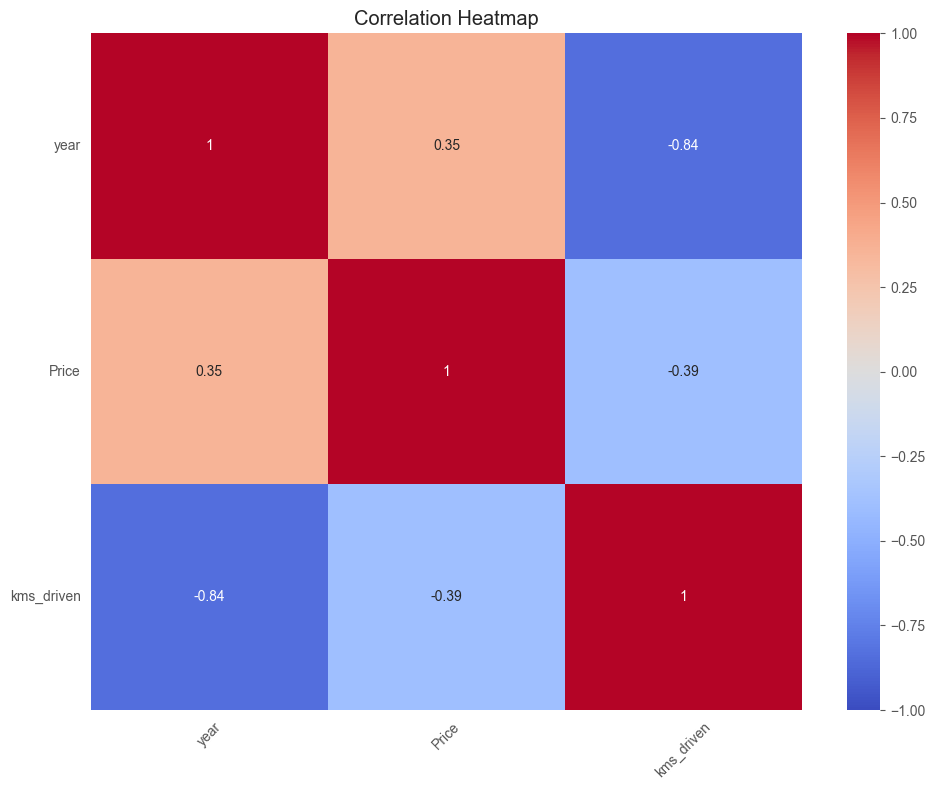

In [306]:
# Вычисление корреляций
numeric_cols = ['year', 'Price', 'kms_driven']
corr_matrix = data[numeric_cols].corr()

# Построение тепловой карты с помощью Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Построение модели 

In [307]:
X=data[['name','company','year','kms_driven','fuel_type']]
y=data['Price']

In [308]:
X

,name,company,year,kms_driven,fuel_type
0,Toyota Camry 55,Toyota,2015,150000,Hybrid
1,Toyota Land Cruiser,Toyota,2015,145000,Petrol
2,Toyota Camry 70,Toyota,2019,180246,Petrol
3,Toyota Highlander IV,Toyota,2019,108000,Hybrid
4,Toyota Crown XVI,Toyota,2023,7750,Hybrid
...,...,...,...,...,...
898,Honda Fit,Honda,2003,220000,Petrol
899,Honda Fit,Honda,2004,240000,Petrol
900,Honda Fit,Honda,2005,210000,Petrol
901,Honda Fit,Honda,2001,270000,Petrol


In [309]:
y.shape

(903,)

In [310]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [312]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [313]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [314]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [315]:
lr=LinearRegression()

In [316]:
pipe=make_pipeline(column_trans,lr)

In [317]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'B...
       'Toyota Supra A91', 'Toyota Supra GR', 'Toyota Yaris Hatchback',
       'Toyota Yaris LE', 'Toyota Yaris Sedan'], dtype=object),
                                                                            array(['BMW', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'Mercedes-Benz',
       'Toyota'], dtype=object),
                                                                            array([' Diesel', ' Petrol', 'Diesel', 'Electric', 'Hybrid', 'Hydrogen',
       'LPG', 'Petrol', 'Plug-in Hybrid'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [318]:
y_pred=pipe.predict(X_test)

In [319]:
r2_score(y_test,y_pred)

0.47114614982532643

In [320]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [321]:
np.argmax(scores)

101

In [322]:
scores[np.argmax(scores)]

0.6785531556109883

In [323]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Toyota Camry 75','Toyota',2023,30500,'Petrol']).reshape(1,5)))

array([47063.47750964])

In [324]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.5557616182341734

## RandomForest

In [325]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np


In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))


In [327]:
rf = RandomForestRegressor()


In [328]:
pipe = make_pipeline(column_trans, rf)


In [329]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'B...
       'Toyota Supra A91', 'Toyota Supra GR', 'Toyota Yaris Hatchback',
       'Toyota Yaris LE', 'Toyota Yaris Sedan'], dtype=object),
                                                                            array(['BMW', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'Mercedes-Benz',
       'Toyota'], dtype=object),
                                                                            array([' Diesel', ' Petrol', 'Diesel', 'Electric', 'Hybrid', 'Hydrogen',
       'LPG', 'Petrol', 'Plug-in Hybrid'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [330]:
y_pred = pipe.predict(X_test)


In [331]:
r2_score(y_test, y_pred)


0.8240859988546146

In [332]:
import pickle
pickle.dump(pipe,open('RandomForestRegressionModel.pkl','wb'))

In [333]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Honda Fit','Honda',2003,85000,'Petrol']).reshape(1,5)))

array([5974.78166667])

In [334]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'BMW 318d Touring',
       'BMW 318i Touring', 'BMW 320d Gran', 'BMW 320d xDrive', 'BMW 320i',
       'BMW 320i Touring', 'BMW 330d Touring', 'BMW 330e',
       'BMW 330e Plug-in', 'BMW 330i', 'BMW 330i M', 'BMW 330i Touring',
       'BMW 330i xDrive', 'BMW 335d', 'BMW 420d Gran', 'BMW 420i Gran',
       'BMW 430i Convertible', 'BMW 520d', 'BMW 520d Touring',
       'BMW 520d xDrive', 'BMW 520i', 'BMW 530d Touring',
       'BMW 530d xDrive', 'BMW 530e Plug-in', 'BMW 530i X', 'BMW 535i',
       'BMW 540i X', 'BMW 640d Gran', 'BMW 640i Gran', 'BMW 730 LD',
       'BMW 730d', 'BMW 730i', 'BMW 740Le xDrive', 'BMW 740i',
       'BMW 760Li X', 'BMW M2', 'BMW M2 Competition', 'BMW M235i',
       'BMW M3', 'BMW M3 Competi